# **Superposition theorem**

Author :Hanieh Malekjafarian

Gmail: haniehmalekjf@gmail.com

## Table of Contents

## <span style = "font-size: 0.8em">1. Introduction
## <span style = "font-size: 0.8em">2. What is superposition theorem?
## <span style = "font-size: 0.8em">3. Step by step guide: 
## <span style = "font-size: 0.8em">4. DC circuits and superposition:
## <span style = "font-size: 0.8em">5. Superposition and pyspice:
## <span style = "font-size: 0.8em">6. Limitation's of superposition:
## <span style = "font-size: 0.8em">7. Advantages of suerposition:
## <span style = "font-size: 0.8em">8. Conclusion
## <span style = "font-size: 0.8em">9. Resources

## 1. Introduction:

Analyzing circuits with multiple sources can be tricky, especially for complex designs. While methods like Nodal Analysis and Mesh Analysis are effective, they can become difficult to apply when dealing with several independent sources. The superposition theorem simplifies this process by breaking the circuit down, making it easier to analyze each source independently before combining the results.

## 2. What is superposition theorem? 

  The superposition theorem states that in any **linear network** that has more than one sourse, you treat each independent source as an individual and then calculate the voltage or current that it has on the circuit and combine the results together.
  
  $$ F\left(\sum_{i=1}^{n} x_i\right) = \sum_{i=1}^{n} F(x_i) $$
  
  $ F\left(\sum_{i=1}^{n} x_i\right) $:  Represents the total current or voltage in the circuit. The purpose of using this theorem is to calculate this value.
  
  $ \sum_{i=1}^{n} F(x_i) $: Represents the individual effects (currents or voltages) from each source. To find the total, we consider one source at a time, keeping others deactivated, and gradually combine their effects.
  
  + Reminder: Linear circuits are circuits where the output is directly proportional to the input. Their behavior doesn’t change with the amount of voltage or current applied, and their I-V characteristics form a straight line.


## 3. Step by step guide: 

To make it easier let’s have an algorithmic view on how to apply superposition theorem in a circuit:

  ### <span style = "font-size: 0.8em">Step 1:
    Identify all the voltage and current sources in the network. 

  ### <span style = "font-size: 0.8em">Step 2:
      For each independent source in the original circuit, create a new sub-circuit. The sub-circuits will be identical to the original except that all independent sources other than the one under consideration will be replaced by their ideal internal impedance. This means that all remaining independent voltage sources will be shorted(wire) and all remaining independent current sources will be opened(break).
      
    + Note: Dependent sources are left intact because they are controlled by circuit variables.

  ### <span style = "font-size: 0.8em">Step 3:
    Solve each sub-circuit for the desired voltages and/or currents using standard series-parallel analysis techniques.  

  ### <span style = "font-size: 0.8em">Step 4:
    Repeat steps 2 and 3 for the rest of the sources. 

  ### <span style = "font-size: 0.8em">Step 5:
      Combine all the contributions from each sub-circuit to determine the final values. Make sure to consider the current directions and voltage polarities throughout the process to ensure accuracy.

## 4. DC circuits and superposition:

First let's take a look at applying superposition to circuits with only DC sources.

### Example 1:

<span style = "font-size: 1.2em">- Use supperposition to find $V_{0}$ .

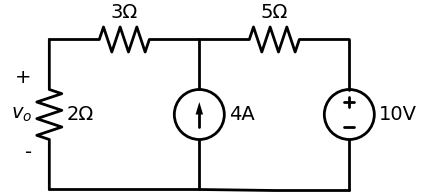

In [2]:
import schemdraw 
import schemdraw.elements as elm 
with schemdraw.Drawing(): 

    elm.Resistor().right().label('3Ω')     
    C1=elm.Resistor().label('5Ω')         
    elm.SourceV().label('10V', loc='bot').reverse().down()   
    C2=elm.Line().left() 
    elm.Line() 
    elm.Resistor().label(['-','$v_o$','+']).label('2Ω', loc='bot').up()  
    elm.SourceI().endpoints(C2.end , C1.start).label('4A', loc='bot')   

#### Step 1: 
In this example we have one current source and one voltage source. 

#### Step 2:
Let's start with the voltage source, so what we want to do is to ignore the current source and eliminate it, as was mentioned before, eliminating current souse means replacing it with its ideal impedance, which effectively acts as an open circuit (break).

![1.png](./IM/1.PNG)

####  Step 3:
Now we will find $ V_{0} $ in the sub-circuit we created, which by using voltage division is: 
$$ V_{01} = \frac{10 \, \text{v} \times 2 \, \Omega}{2 \, \Omega + 5 \, \Omega + 3 \, \Omega} = 2 \, \text{v} $$


#### Step 4:
So this time we keep the current source and eliminate the voltage souse, as was mentioned eliminating voltage source acts as a wire. 

![2.png](./IM/2.PNG)

Now we have 5Ω resistor parallel to a 4A current source tht we can replace by  a voltage source with value of (V=RI) 5Ω×4A=20V .

![3.png](./IM/3.PNG)

And again by using voltage division we have : 
$$ V_{02} = \frac{20 \, \text{v} \times 2 \, \Omega}{2 \, \Omega + 5 \, \Omega + 3 \, \Omega} = 4 \, \text{v} $$

####  Step 5:
now all we have to do is to add them all together:
$$ V_{0} = V_{01} + V_{02} $$
$$ V_{0} = 2v + 4v = 6v $$

### 5. Superposition and pyspice:

Let's find $V_{0}$ in the previous example using pyspice analysis:

In [3]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create the circuit
circuit = Circuit('Superposition Circuit')

# Define the voltage and current sources
circuit.V(1, circuit.gnd , 'node2', 10@u_V)  
circuit.I(1, 'node1', circuit.gnd, 4@u_A)      

# Resistors
circuit.R(1, 'Vo', 'node1', 3@u_Ohm)       
circuit.R(2, 'Vo', circuit.gnd, 2@u_Ohm)    
circuit.R(3, 'node2', 'node1', 5@u_Ohm)    

# Set up the simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Total Vo 
analysis_vo_total = simulator.operating_point()
vo_total = abs(float(analysis_vo_total['Vo'][0]))
print(f'Total Vo : {vo_total} V')

Total Vo : 6.0 V


wich is the same value we came to using superpposition, now even if we apply superposition in the pyspice code manualy we have:

In [4]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create the circuit
circuit = Circuit('Superposition Circuit')

# Define the voltage and current sources
circuit.V(1, circuit.gnd , 'node2', 10@u_V)  
circuit.I(1, 'node1', circuit.gnd, 4@u_A)       

# Resistors
circuit.R(1, 'Vo', 'node1', 3@u_Ohm)        
circuit.R(2, 'Vo', circuit.gnd, 2@u_Ohm)      
circuit.R(3, 'node2', 'node1', 5@u_Ohm)    

# Set up the simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Only the voltage source active
circuit['I1'].dc_value = 0@u_A               # Deactivate the current source
analysis_v_source = simulator.operating_point()
vo_voltage_v_source = abs(float(analysis_v_source['Vo'][0]))

print(f'Vo with only voltage source active: {vo_voltage_v_source} V') 

# Only the current source active
circuit['V1'].dc_value = 0@u_V               # Deactivate the voltage source
circuit['I1'].dc_value = 4@u_A               # Reactivate the current source
analysis_i_source = simulator.operating_point()
vo_voltage_i_source = abs(float(analysis_i_source['Vo'][0]))

print(f'Vo with only current source active: {vo_voltage_i_source} V')

# Total Vo using superposition
vo_total = vo_voltage_v_source + vo_voltage_i_source
print(f'Total Vo using superposition: {vo_total} V')

Vo with only voltage source active: 2.0 V
Vo with only current source active: 4.0 V
Total Vo using superposition: 6.0 V


### Example 2:

<span style = "font-size: 1.2em">- Use supperposition to find $V_{0}$ .

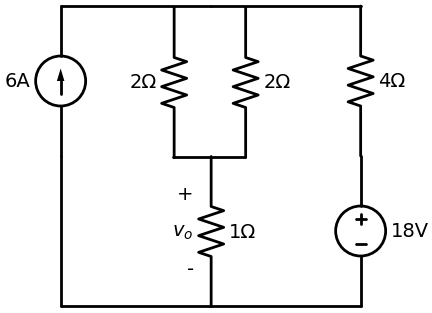

In [5]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    C1=elm.Line().up()
    elm.SourceI().up().label('6A')
    elm.Line().right()
    elm.Line().right()
    elm.Resistor().down().label('4Ω', loc='bot')
    C2=elm.SourceV().down().label('18V', loc='bot').reverse()
    elm.Resistor().at((2.27,5.97)).down().label('2Ω')
    elm.Resistor().at((3.7,5.97)).down().label('2Ω', loc='bot')
    elm.Line().at((2.25, 2.99)).right().length(1.44)
    elm.Resistor().at((3.01,2.99)).label(['+','$v_o$','-']).label('1Ω', loc='bot').down()
    elm.Line().endpoints(C1.start,C2.end)


#### Step 1: 
In this example we have one current source and one voltage source. 

####  Step2:
Let's pick one source and eliminate the other. We can start with the voltage source. If we keep the voltage source and replace the current source with a break, the circuit simplifies to:

![4.png](./IM/4.PNG)

#### Step3:
we have two $2 \, \Omega $ resistors that are parallel to each other so the Equivalent resistance is:

$$ 2 \, \Omega \parallel 2 \, \Omega = {\frac{1}{2} + \frac{1}{2}} = 1 \, \Omega $$

![5.png](./IM/5.PNG)

using kvl to calculate $V_{01}$:
$$ +18V - 1i - 1i - 4i = 0 $$
$$ 6i = 18 $$
$$ i = 3A $$


and then by using ohm's law:
$$ V_{01} = 3A \times 1 \, \Omega = 3 \, V $$

####  Step 4:
So this time we keep the current source and eliminate the voltage source; as was mentioned, eliminating the voltage source acts as a wire.

![6.png](./IM/6.PNG)

With using current division in two branches, since the total resistance in branch one is 2 and the other is 4, the current through branch one is:
$$ i = \frac{(6A)(4 \, \Omega)}{(4 \, \Omega + 2 \, \Omega)}= 4A $$


and then using ohm's law $V_{02}$ is :
$$ V_{02} = 4A \times 1 \, \Omega = 4 \, V $$

####  Step 5:
now all we have to do is to add them together:
$$ V_{0} = V_{01} + V_{02} $$
$$ V_{0} = 3v + 4v = 7v $$

#### Example 2 in pyspice:

In [6]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create the circuit
circuit = Circuit('Superposition Circuit')

# Define the voltage and current sources
circuit.I(1, 'node1', circuit.gnd, 6@u_A) 
circuit.V(1, circuit.gnd , 'node2', 18@u_V)
# Resistors
circuit.R(1, 'node1','Vo', 2@u_Ohm)  
circuit.R(2, 'node1','Vo', 2@u_Ohm) 
circuit.R(3, 'Vo' , circuit.gnd, 1@u_Ohm) 
circuit.R(4, 'node1', 'node2', 4@u_Ohm) 

# Set up the simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Total Vo 
analysis_vo_total = simulator.operating_point()
vo_total = abs(float(analysis_vo_total['Vo'][0]))
print(f'Total Vo : {vo_total} V')

Total Vo : 7.0 V


### Example 3:

<span style = "font-size: 1.2em">- Use supperposition to find $V_{0}$ .

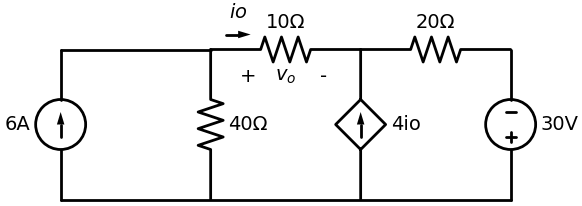

In [7]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    C1=elm.SourceI().up().label('6A')
    C2=elm.Line().right()
    C3=elm.Resistor().label(['+','$v_o$','-'],loc='bot').label('10Ω')
    elm.Resistor().label('20Ω')
    C4=elm.SourceV().down().label('30V', loc='bot')
    elm.Line().endpoints(C1.start, C4.end)
    elm.Resistor().at(C2.end).down().label('40Ω', loc='bot')
    elm.SourceControlledI().at(C3.end).down().label('4io', loc='bot').reverse()
    elm.Arrow().right().at((C3.start[0] + 0.3, C3.start[1] + 0.3)).length(0.5).label('$io$', loc='top')

####  Step 1: 
In this example we have one independent current source, one dependent current source and one voltage source . 

#### Step 2:
Let's keep the current source this time and eliminate the voltage source. (When working with superposition, the dependent sources remain intact. )
![7.png](./IM/7.PNG)

#### Step 3:
using nodal voltage analysis we have 3 equations:
$$ (1)\quad \frac{V_a}{40} + \frac{V_a - V_b}{10} - 6 = 0  $$
$$ (2)\quad -4i + \frac{V_b}{20} + \frac{V_b - V_a}{10} = 0$$
$$ (3)\quad i = \frac{V_a - V_b}{10} $$

solving this equations we have:

$$ 5 V_a - 4 V_b = 240 $$
$$ 10 V_a = 11 V_b $$

that simplifies to:

$$ V_a = 176 v $$
$$ V_b = 160 v $$
$$ i = \frac{176 - 160}{10} = 1.6 A $$

So $V_1$ using ohm's low is:
$$ V_1 = Ri = (10 \Omega)(1.6 A) =  16 v$$

####  Step 4:
So this time, we keep the voltage source and eliminate the current source, while the dependent source remains intact.
![8.png](./IM/8.PNG)

again with using nodal voltage analysis we have two equations:
$$ (1)\quad \frac{V_c}{50} - 4i + \frac{V_c + 30}{20} = 0  $$
$$ (2)\quad i = \frac{0-V_c}{50}$$

which simplifies to:
$$ V_c = -10 v $$
$$ i = \frac{0-(-10)}{50} = 0.2 A $$

so $ V_2 $ using ohm's low is:
$$ V_2 = Ri = (10 \Omega)(0.2 A) =  2 v$$

####  Step 5:
now all we have to do is to add them together:
$$ V_{0} = V_{1} + V_{2} $$
$$ V_{0} = 16v + 2v = 18v $$

#### Example 3 in pyspice:

In [ ]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create the circuit
circuit = Circuit('Superposition Circuit')

# Define the voltage and current sources 
circuit.V('dummy', 'node3', circuit.gnd , 0@u_V) #because CCCS is dependent on the current trough 10ohm resistore
circuit.F(1, 'node1' , circuit.gnd, 'Vdummy', 4) #dependent current source
circuit.V(1, 'node2' , 'node1', 30@u_V) # Voltage source (30V)
circuit.I(1, 'Vo', 'node1', 6@u_A)  # Current source (6A)
  

# Define resistors
circuit.R(1, 'Vo' , 'node3', 10@u_Ohm)  # Resistor between gnd and Vo (10Ω)
circuit.R(2, 'node2', circuit.gnd, 20@u_Ohm)  # Resistor between node2 and gnd (20Ω)
circuit.R(3, 'Vo', 'node1', 40@u_Ohm)  # Resistor between Vo and ground (40Ω)


# Set up the simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Total Vo using superposition
analysis_vo_total = simulator.operating_point()
vo_total = abs(float(analysis_vo_total['Vo'][0]))
print(f'Total Vo : {vo_total} V')

## AC circuits and superposition:

When solving a circuit with multiple AC sources, an important condition is that the sources must have the same frequency. This is because the angular frequency ($ \omega $) is used in phasor analysis to describe circuit elements in the frequency domain. 
However, with the superposition theorem, we can handle circuits with sources of <u>different frequencies</u> because this method involves analyzing one source at a time while turning off all other sources. For each sub-circuit that is created, only one source's frequency is considered, allowing us to use a single ($ \omega $) for that analysis.

### Example:

<span style = "font-size: 1.2em">-find the voltage across R ($V_{0}$) .

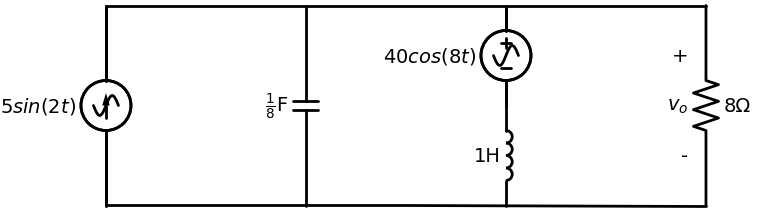

In [9]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    A=elm.SourceSin().up().label('$5sin(2t)$').length(4)
    elm.SourceI().up().at(A.start).length(4)
    L1=elm.Line().right().length(4)
    L2=elm.Line().right().length(4)
    elm.Line().right().length(4)
    elm.Resistor().down().label('8Ω', loc='bot').label(['+','$v_o$','-']).length(4)
    elm.Line().to(A.start).length(4)
    elm.Capacitor().at(L1.end).down().label(r'$\frac{1}{8}$F').length(4)
    elm.SourceV().at(L2.end).down().label('$40cos(8t)$').reverse().length(2)
    elm.SourceSin().at(L2.end).down().length(2)
    elm.Inductor().label('1H').length(2)


#### Step 1: 
In this example, we have one AC current source with $ \omega = 2$and one AC voltage source with $ \omega = 8$.Altough the sources are AC, the steps for applying the superposition theorem remain the same.

#### Step 2:
Let's start with the current source and replace the voltage source with wire,  and then convert the circuit to phasor form.

![9.png](./IM/9.PNG)
####  Step 3:
using nodal voltage analysis we have:
$$ \frac{V_{01}}{-4j} + \frac {V_{01}}{2j} + \frac {V_{01}}{8} = 5$$
$$ V_{01} = \frac {(5)(4j)(8)}{8 + 4j} $$
$$ V_{01} = 8 + 16j $$
$$ V_{01} = 8\sqrt{5} sin (2t+ \tan^{-1}(2))$$ 

####  Step 4:
So this time, we keep the voltage source and eliminate the current source.

![10.png](./IM/10.PNG)


again with using nodal voltage analysis we have :
$$ \frac {V_{02}}{-j} + \frac {V_{02}-40}{8j} + \frac{V_{02}}{8} = 0$$
$$ V_{02} (\frac {-1}{j} + \frac {1}{8j} + \frac {1}{8}) = \frac {40}{8j}$$
$$ V_{02} = \frac {40}{-7+j} $$
$$ V_{02} = 4\sqrt{2}cos(8t + \tan^{-1}(\frac{1}{7})) $$

####  Step 5:
now all we have to do is to add them together:
$$ V_{0} = V_{01} + V_{02} $$
$$ V_{0} = 8\sqrt{5} sin (2t+ \tan^{-1}(2)) + 4\sqrt{2}cos(8t + \tan^{-1}(\frac{1}{7})) $$

## 6. Limitation's of superposition: 

### <span style = "font-size: 0.8em">1. It can be only applied to linear circuits.
  The Superposition Theorem only applies to linear circuits when voltage and current have a constant relationship. It cannot be used in circuits         including nonlinear components such as diodes and transistors.

### <span style = "font-size: 0.8em">2. Power cannot be calculated using this theorem.
   Superposition theorem cannot be applied for power calculations because power of any electronic device is not linear in current or voltage.If power is needed, it can be computed from these currents or voltages.

### <span style = "font-size: 0.8em">3. all components must be bilateral.
   meaning that they behave the same, with current flowing in either direction through them. Resistors have no polarity-specific behavior, thus, the circuits we’ve been studying so far all meet this criterion.


### <span style = "font-size: 0.8em">5. Circuits with imbalanced bridges cannot use this theorem.
   the superposition theorem works only for circuits that are reducible to series and/or parallel combinations for each power source evaluated individually. Therefore, it is useless for analyzing an unbalanced bridge circuit.

### <span style = "font-size: 0.8em">6. Can be time-consuming:
   for circuits with a large number of independent sources, you need to perform separate calculations for each source. In such cases, other circuit analysis techniques like nodal analysis or mesh analysis might be more efficient.

### <span style = "font-size: 0.8em">7. May Not Capture All Effects: 
   In some cases, interactions between sources can lead to effects that the Superposition Theorem doesn’t fully capture. It assumes that the interaction between sources is negligible, which might not always be the case.


## 7. Advantages of suerposition: 

1. superposition makes it passible to calculate the voltages and the currents in a circuit that uses sources with different frequencies.
2. Superposition theorem is not limited to circuit analysis but is applicable in many fields where cause and effect bear a linear relationship to one another.  
3. It makes the analysis of the circuit easy by breaking down the circuits into smaller parts for easy understanding.
4. It makes the analysis of an individual source easy by making it easy to study one component of an electronic circuit without impacting the other components.
5.  By studying the effect of each source independently, we can gain insight into how different sources interact with each other and the resulting circuit behavior.

## 8. Conclusion:

In Conclusion, Superposition Theorem always allows you to evaluate complex circuits with multiple voltage or current sources by evaluating each source individually and setting all other sources to their ideal internal impedance (Voltage source is replaced by short circuit, Current source is replaced by open circuit). This allows you to break down a difficult circuit into simpler sub-circuits and more quickly solve for voltage, current, etc.

## 9. Sources:

1. https://www.emcourse.com/news-blog/superposition-theorem-solve-linear-dc-network
2. https://www.allaboutcircuits.com/textbook/direct-current/chpt-10/superposition-theorem/
3. https://circuitideas311.weebly.com/lesson-eight-superposition/lesson-eight-superposition
4. https://www.geeksforgeeks.org/superposition-theorem/
5. https://testbook.com/electrical-engineering/superposition-theorem-principle-statement-and-problems#:~:text=The%20Superposition%20Theorem%20is%20a,of%20each%20independent%20source%20separately.
6. https://en.wikipedia.org/wiki/Superposition_principle